<a href="https://colab.research.google.com/github/JasonLn0711/1131_TAICA_ML/blob/main/ML_hw3_11_cpusmall_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


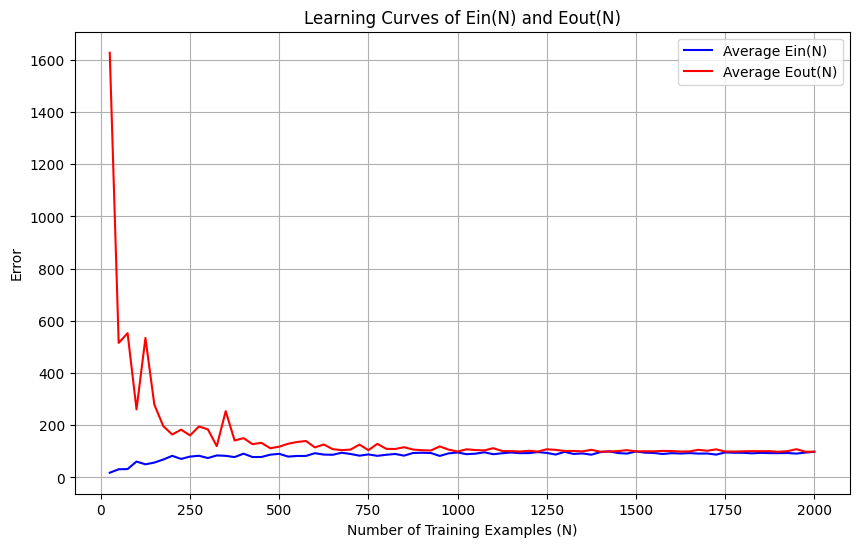

Findings:
As N increases, both Ein and Eout tend to decrease, indicating improved model generalization with more training data.
The gap between Ein and Eout narrows as N grows, suggesting reduced overfitting with larger training sizes.
For smaller values of N, there is a significant difference between Ein and Eout, which indicates overfitting. The model fits the training data well but struggles to generalize to unseen data.
As N becomes larger, both Ein and Eout converge to similar values, indicating that the model is better at generalizing to new data, reducing both bias and variance.
The learning curve shows that adding more training data helps the model improve its performance, especially for smaller training set sizes where the model initially suffers from high variance.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive

# Load the dataset
drive.mount('/d')
file_path = '/d/MyDrive/ML_hw3_attachment-cpusmall_scale.txt'
data = []
with open(file_path, 'r') as f:
    for line in f:
        values = line.strip().split()
        y = float(values[0])
        x = [float(v.split(':')[1]) for v in values[1:]]
        data.append((x, y))

X_full = np.array([x for x, y in data])
y_full = np.array([y for x, y in data])

# Parameters
N_values = np.arange(25, 2001, 25)
num_experiments = 16
average_Ein = []
average_Eout = []

# Run experiments for each value of N
for N in N_values:
    Ein_total = 0
    Eout_total = 0

    for _ in range(num_experiments):
        # Randomly sample N examples for training
        indices = np.random.choice(len(X_full), N, replace=False)
        X_train = X_full[indices]
        y_train = y_full[indices]

        # Add bias term (x_0 = 1)
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
        X_full_bias = np.hstack((np.ones((X_full.shape[0], 1)), X_full))

        # Fit linear regression model
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train, y_train)
        w_lin = model.coef_

        # Calculate Ein (in-sample error)
        y_train_pred = X_train @ w_lin
        Ein = np.mean((y_train - y_train_pred) ** 2)
        Ein_total += Ein

        # Calculate Eout (out-of-sample error)
        y_full_pred = X_full_bias @ w_lin
        Eout = np.mean((y_full - y_full_pred) ** 2)
        Eout_total += Eout

    # Calculate average Ein and Eout
    average_Ein.append(Ein_total / num_experiments)
    average_Eout.append(Eout_total / num_experiments)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(N_values, average_Ein, label='Average Ein(N)', color='blue')
plt.plot(N_values, average_Eout, label='Average Eout(N)', color='red')
plt.xlabel('Number of Training Examples (N)')
plt.ylabel('Error')
plt.title('Learning Curves of Ein(N) and Eout(N)')
plt.legend()
plt.grid(True)
plt.show()

# Describe findings
print("Findings:")
print("As N increases, both Ein and Eout tend to decrease, indicating improved model generalization with more training data.")
print("The gap between Ein and Eout narrows as N grows, suggesting reduced overfitting with larger training sizes.")
print("For smaller values of N, there is a significant difference between Ein and Eout, which indicates overfitting. The model fits the training data well but struggles to generalize to unseen data.")
print("As N becomes larger, both Ein and Eout converge to similar values, indicating that the model is better at generalizing to new data, reducing both bias and variance.")
print("The learning curve shows that adding more training data helps the model improve its performance, especially for smaller training set sizes where the model initially suffers from high variance.")